## Import required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report
import xgboost as xgb 
import joblib
import kagglehub
%matplotlib inline
import os

## EDA

In [2]:
# Download dataset
dir_path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# Find the CSV file inside the downloaded folder
file_path = os.path.join(dir_path, "creditcard.csv")

# Load the dataframe
df = pd.read_csv(file_path)
df.columns = df.columns.str.lower().str.replace(' ', '_')
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  fl

In [3]:
# Display the first few rows
print("First 5 Rows:")
print(df.head(1))

First 5 Rows:
   time        v1        v2        v3        v4        v5        v6        v7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         v8        v9  ...       v21       v22       v23       v24       v25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   

        v26       v27       v28  amount  class  
0 -0.189115  0.133558 -0.021053  149.62      0  

[1 rows x 31 columns]


In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
# Summary statistics of stock prices
print("Statistic Values:")
df.describe()

Missing Values:
time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64
Statistic Values:


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.duplicated().sum()

np.int64(1081)

In [6]:
df=df.drop_duplicates()

In [7]:
class_counts = df['class'].value_counts()
class_counts

class
0    283253
1       473
Name: count, dtype: int64

### Distribution of Transaction Amount 

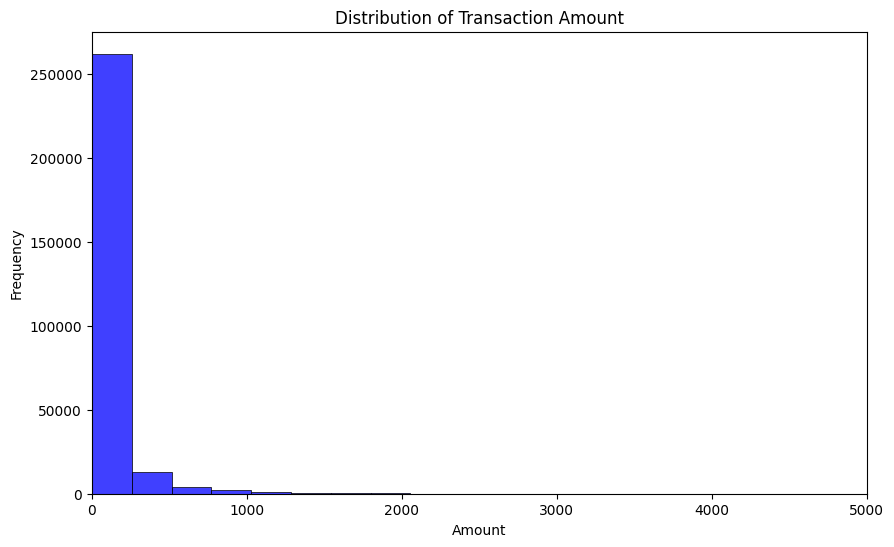

In [8]:

plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=100, color='blue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xlim(0, 5000)
plt.show()

### Amount Distribution by Class

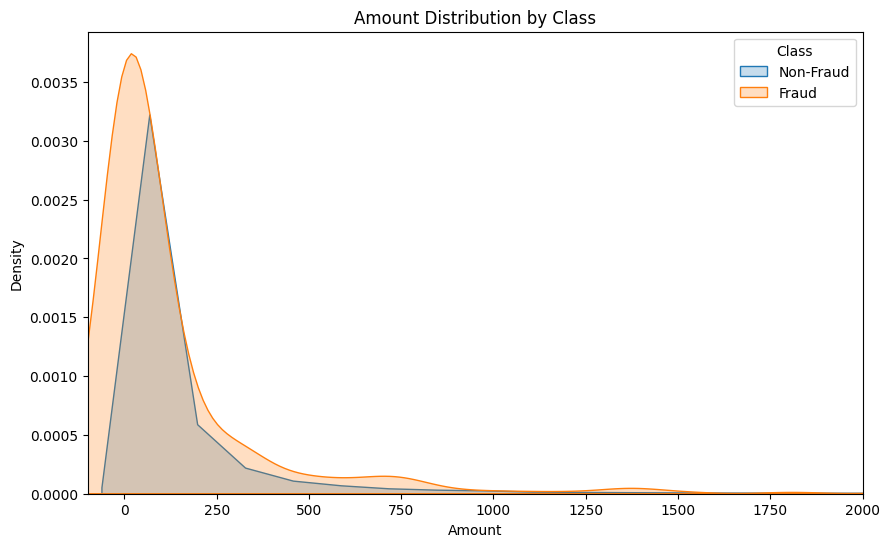

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['class'] == 0]['amount'], label='Non-Fraud', fill=True)
sns.kdeplot(df[df['class'] == 1]['amount'], label='Fraud', fill=True)
plt.title('Amount Distribution by Class')
plt.xlabel('Amount')
plt.xlim(-100, 2000)
plt.legend(title='Class')
plt.show()

## Split the dataset

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1,stratify=df['class'])
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1,stratify=df_full_train['class'])

df_train = df_train.reset_index(drop=True)  
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

X_train = df_train.drop('class', axis=1)
X_val = df_val.drop('class', axis=1)
X_test = df_test.drop('class', axis=1)

y_train = df_train['class']
y_val = df_val['class']
y_test = df_test['class']

del df_train['class']
del df_val['class']
del df_test['class']


In [11]:
X_train.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount'],
      dtype='object')

## Apply scaling

In [12]:
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
X_train

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,67034.0,1.234310,-0.095081,0.315747,0.061370,-0.536769,-0.674537,-0.174828,-0.014882,0.381337,...,-0.176570,-0.092541,-0.301903,0.085943,0.106162,0.123028,0.961606,-0.075439,-0.000454,9.99
1,32952.0,-0.220983,-0.391480,-0.685256,-3.460632,1.220017,3.103783,-1.159196,1.246351,-2.518314,...,-0.376004,-0.127651,-0.325462,0.010873,0.961228,-0.093527,-0.407212,-0.055330,-0.035154,10.00
2,59584.0,1.329725,-1.494552,-1.436471,-2.434639,1.033818,3.117443,-1.066022,0.660862,-2.219059,...,0.059629,-0.619447,-1.930661,0.140009,0.917037,0.199367,-0.640384,-0.004500,0.040845,144.95
3,115868.0,1.990640,0.012500,-1.761302,0.577974,0.000039,-1.550548,0.230231,-0.330989,0.785696,...,-0.222481,0.201451,0.617641,-0.033220,-0.051688,0.195227,-0.103196,-0.017306,-0.027986,37.13
4,81211.0,-1.827670,0.686886,1.678687,-1.685654,-1.566990,-0.779896,-0.812478,-0.525190,-0.636217,...,-0.349242,1.266705,0.989912,-0.254594,0.729720,-0.057190,-0.318278,-0.923682,-0.521281,24.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170230,46175.0,-1.708306,1.948189,-0.005031,-0.867778,-0.729693,-0.575881,-0.027666,0.129821,1.617316,...,0.969809,-0.129583,-0.032573,0.324251,-0.009946,-1.148313,0.784057,0.678557,0.635000,0.77
170231,21191.0,-0.892075,-0.147065,2.008088,-1.115533,-0.786981,0.013696,0.227435,-0.624171,1.030750,...,-0.308735,-0.097627,0.391628,0.154029,0.005000,-0.323952,-0.438570,-0.787270,-0.494638,85.31
170232,40362.0,-1.343052,1.097879,1.651334,-0.531389,-0.038414,0.197716,-0.211565,-0.209158,0.256186,...,-0.492153,0.790679,-0.156846,-0.180045,-0.461269,0.160695,-0.699756,0.076427,0.043057,4.99
170233,47476.0,-0.135597,2.078163,-2.160883,1.524506,0.625250,-1.770445,0.607808,0.082382,-0.072076,...,0.208559,-0.160046,-0.094273,0.228355,0.158884,-0.431768,-0.453310,0.058741,-0.174221,0.89


In [14]:
X_train_scaled

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,-0.581151,0.633451,-0.054755,0.204903,0.043271,-0.394082,-0.506182,-0.141795,-0.011165,0.350021,...,-0.234267,-0.129942,-0.416854,0.141699,0.172243,0.236287,1.998260,-0.196138,-0.003121,-0.313619
1,-1.298998,-0.121026,-0.235893,-0.460147,-2.447186,0.881050,2.324189,-0.947147,1.056705,-2.303828,...,-0.497239,-0.178514,-0.449419,0.018323,1.582118,-0.180192,-0.843017,-0.145569,-0.111498,-0.313579
2,-0.738065,0.682918,-0.910011,-0.959243,-1.721692,0.745901,2.334422,-0.870918,0.560979,-2.029942,...,0.077182,-0.858870,-2.668306,0.230555,1.509254,0.383101,-1.327017,-0.017749,0.125865,0.227748
3,0.447407,1.025561,0.010991,-1.175055,0.408569,-0.004449,-1.162409,0.189601,-0.278809,0.720103,...,-0.294805,0.276770,0.854244,-0.054143,-0.088028,0.375139,-0.211966,-0.049951,-0.089108,-0.204752
4,-0.282550,-0.953991,0.423127,1.110419,-1.192074,-1.141849,-0.585107,-0.663483,-0.443236,-0.581276,...,-0.461950,1.750456,1.368839,-0.417967,1.200396,-0.110307,-0.658416,-2.329189,-1.629790,-0.253449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170230,-1.020490,-0.892108,1.193944,-0.008217,-0.613743,-0.534112,-0.432278,-0.021396,0.111353,1.481228,...,1.277337,-0.181186,-0.044555,0.533355,-0.019202,-2.208751,1.629718,1.699916,1.981557,-0.350604
170231,-1.546712,-0.468944,-0.086524,1.329268,-0.788934,-0.575693,0.009379,0.187313,-0.527042,0.944384,...,-0.408538,-0.136978,0.541823,0.253598,0.005441,-0.623343,-0.908108,-1.986158,-1.546578,-0.011487
170232,-1.142926,-0.702747,0.674296,1.092247,-0.375877,-0.032360,0.147230,-0.171851,-0.175656,0.235480,...,-0.650392,1.091915,-0.216340,-0.295446,-0.763367,0.308727,-1.450256,0.185756,0.132776,-0.333676
170233,-0.993088,-0.076759,1.273375,-1.440530,1.077874,0.449349,-1.327136,0.498512,0.071187,-0.064956,...,0.273561,-0.223329,-0.129844,0.375751,0.259172,-0.830695,-0.938704,0.141282,-0.545837,-0.350122


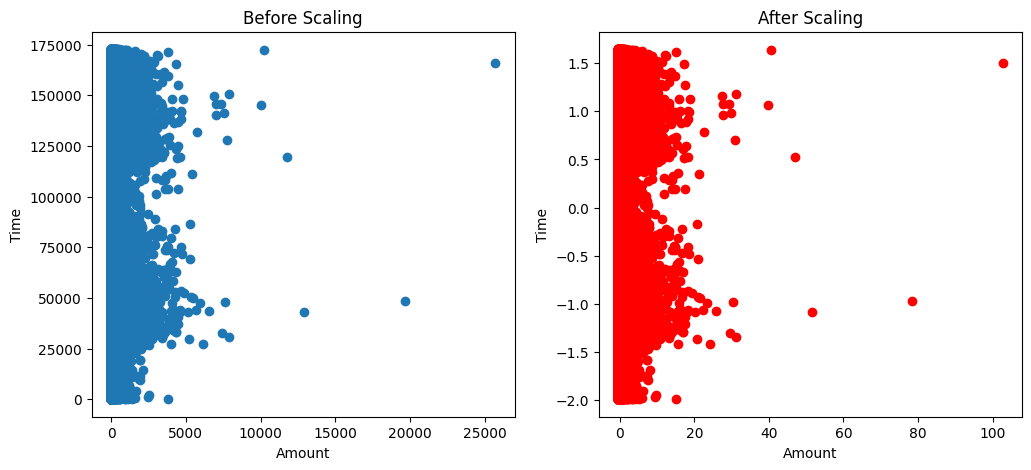

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['amount'], X_train['time'])
ax1.set_xlabel("Amount")
ax1.set_ylabel("Time")
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['amount'], X_train_scaled['time'],color='red')
ax2.set_xlabel("Amount")
ax2.set_ylabel("Time")
ax2.set_title("After Scaling")
plt.show()

## Train XGB model

In [16]:
features= X_train.columns.astype(str).tolist()
dtrain = xgb.DMatrix(
    data=X_train_scaled.values,
    label=y_train.values,
    feature_names=features
)

dval = xgb.DMatrix(
    data=X_val_scaled.values,
    label=y_val.values,
    feature_names=features
)

dtest = xgb.DMatrix(
    data=X_test_scaled.values,
    label=y_test.values,
    feature_names=features
)

watchlist = [(dtrain, 'train'), (dval, 'val')]

### Parameter tuning

In [17]:
evals_result = {}
scores = []
count_neg = (y_train == 0).sum()
count_pos = (y_train == 1).sum()
scale_pos_weight = count_neg / count_pos

for depth in [2, 3, 6]:
    for eta in [0.01, 0.1, 0.5]:
        xgb_params = {
        'eta': eta, 
        'max_depth': depth,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'scale_pos_weight': scale_pos_weight,
        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
        }

        print(f"Training: eta={eta}, max_depth={depth}")
        model = xgb.train (
                    params=xgb_params,
                    dtrain=dtrain, 
                    num_boost_round=200,
                    evals=watchlist,
                    verbose_eval=False,
                    evals_result=evals_result)
        
        y_pred = model.predict(dval)
        auc = roc_auc_score(y_val, y_pred)
        scores.append((depth, eta, auc))

        print(f"AUC score={auc}\n")
        

Training: eta=0.01, max_depth=2
AUC score=0.9922199098806149

Training: eta=0.1, max_depth=2
AUC score=0.9926119756584754

Training: eta=0.5, max_depth=2
AUC score=0.9943906721791238

Training: eta=0.01, max_depth=3
AUC score=0.9938307242068101

Training: eta=0.1, max_depth=3
AUC score=0.9931530635945557

Training: eta=0.5, max_depth=3
AUC score=0.9967090630371161

Training: eta=0.01, max_depth=6
AUC score=0.9962729595391834

Training: eta=0.1, max_depth=6
AUC score=0.9972388163701399

Training: eta=0.5, max_depth=6
AUC score=0.996504854368932



In [18]:
columns = ['max_depth', 'eta', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values("auc", ascending=False)

,max_depth,eta,auc
7,6,0.10,0.997239
5,3,0.50,0.996709
8,6,0.50,0.996505
6,6,0.01,0.996273
2,2,0.50,0.994391
3,3,0.01,0.993831
4,3,0.10,0.993153
1,2,0.10,0.992612
0,2,0.01,0.992220


In [19]:
best_depth, best_eta, best_auc = df_scores.loc[df_scores['auc'].idxmax()]
print("\nBest params:", best_depth, best_eta, "AUC:", best_auc)


Best params: 6.0 0.1 AUC: 0.9972388163701399


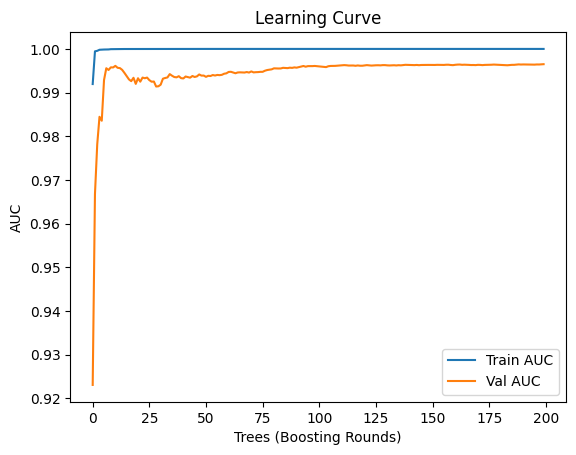

In [20]:
epochs = len(evals_result['train']['auc'])

plt.plot(range(epochs), evals_result['train']['auc'], label='Train AUC')
plt.plot(range(epochs), evals_result['val']['auc'], label='Val AUC')
plt.xlabel('Trees (Boosting Rounds)')
plt.ylabel('AUC')
plt.title('Learning Curve')
plt.legend()
plt.show()

## Train with full dataset

In [21]:
X_full_train_scaled = pd.concat([X_train_scaled, X_val_scaled], axis=0).reset_index(drop=True)
y_full_train = pd.concat([y_train, y_val], axis=0).reset_index(drop=True)

count_neg_full = (y_full_train == 0).sum()
count_pos_full = (y_full_train == 1).sum()
scale_pos_weight_full = count_neg_full / max(1, count_pos_full)

dfulltrain = xgb.DMatrix(
    data=X_full_train_scaled.values,
    label=y_full_train.values,
    feature_names=features
)   

watchlist_full = [(dfulltrain, 'fulltrain'), (dtest, 'test')]


In [22]:
xgb_params = {
        'eta': best_eta, 
        'max_depth': int(best_depth),
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
        'scale_pos_weight': scale_pos_weight_full
    }

model_final = xgb.train (
                params=xgb_params,
                dtrain=dfulltrain, 
                num_boost_round=200,
                evals=watchlist_full ,
                verbose_eval=False
            )


### Metrics

In [23]:
y_pred_test = model_final.predict(dtest)
test_auc = roc_auc_score(y_test, y_pred_test)
print(f"Final Test AUC: {test_auc:.5f}")
print(classification_report(y_test, (y_pred_test > 0.5).astype(int)))

Final Test AUC: 0.96179
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.76      0.84        95

    accuracy                           1.00     56746
   macro avg       0.97      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746



## Save the model

In [24]:
model_final.save_model("credit_fraud_detect_model.json")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']